# 1. Import Thư viện

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


* **show_id:** Mã số hiệu của chương trình. Mỗi chương trình (phim hoặc series) trên Netflix đều có một mã số duy nhất để nhận biết.

* **type:** Loại nội dung. Cho biết chương trình đó là "Movie" (Phim điện ảnh) hay "TV Show" (Series truyền hình).

* **title:** Tựa đề. Tên chính thức của phim hoặc series.

* **director:** Đạo diễn. Người hoặc nhóm người chịu trách nhiệm chỉ đạo quá trình sản xuất phim.

* **cast:** Diễn viên. Danh sách các diễn viên chính tham gia trong phim hoặc series.

* **country:** Quốc gia sản xuất. Quốc gia nơi phim hoặc series được sản xuất.

* **date_added:** Ngày thêm vào Netflix. Ngày mà chương trình được đưa lên nền tảng Netflix.

* **release_year:** Năm phát hành. Năm mà chương trình được công chiếu lần đầu.

* **rating:** Xếp hạng độ tuổi. Xếp hạng cho biết chương trình phù hợp với đối tượng khán giả ở độ tuổi nào (ví dụ: TV-MA cho người lớn, TV-14 cho thanh thiếu niên trên 14 tuổi).

* **duration:** Thời lượng. Đối với phim, là thời lượng của phim tính bằng phút. Đối với series, thường là số mùa.

* **listed_in:** Thể loại. Các thể loại hoặc danh mục mà chương trình thuộc về (ví dụ: Hành động, Kinh dị, Hài hước).

* **description:** Mô tả. Một đoạn văn bản ngắn mô tả nội dung chính của phim hoặc series.

In [156]:
df.shape

(8807, 12)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# 2. Làm sạch dữ liệu

<Axes: >

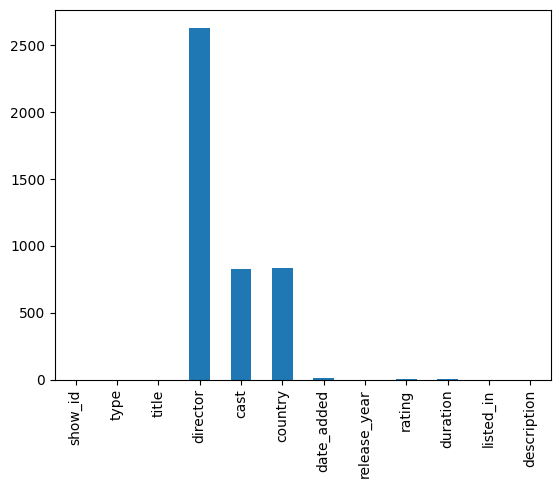

In [158]:
df.isnull().sum().plot(kind='bar')

In [159]:
df.dropna(inplace=True)
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# 3. Phân tích đơn biến

In [160]:
# Tìm số lượng phân loại trong cột Type
df['type'].nunique()

2

In [161]:
type_counts = df['type'].value_counts()
type_counts

type
Movie      5185
TV Show     147
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

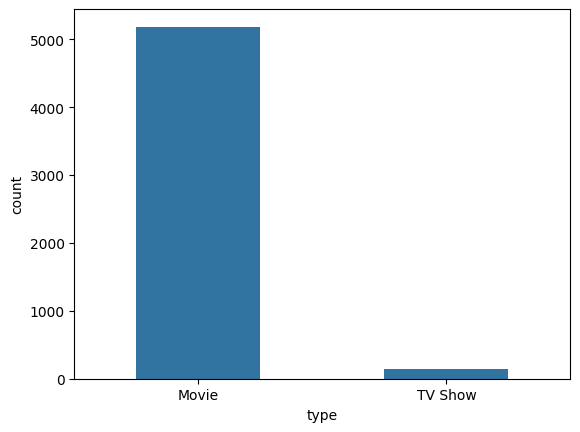

In [162]:
sns.countplot(x = df['type'],width=0.5)

In [163]:
df['country'].nunique()

604

<Axes: xlabel='country', ylabel='count'>

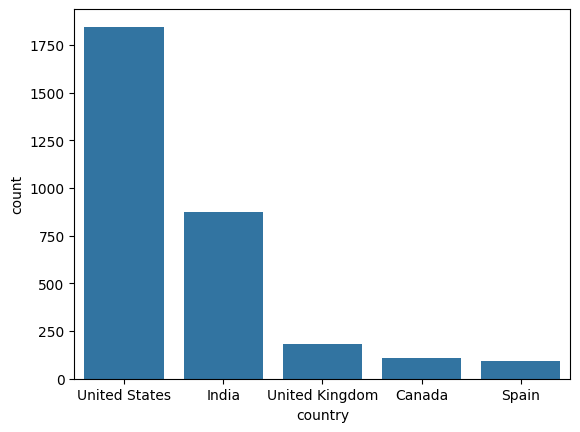

In [164]:
country_counts = df['country'].value_counts()
country_counts
top_countries = country_counts.nlargest(5)
top_countries
sns.countplot(x  = df['country'], order = top_countries.index)

### Trên Netflix, hầu hết các chương trình đều đến từ Mỹ và Ấn Độ

/var/folders/n5/1571yh0x7_g0dbltk948d2tm0000gn/T/ipykernel_36650/3610571043.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='Set3')


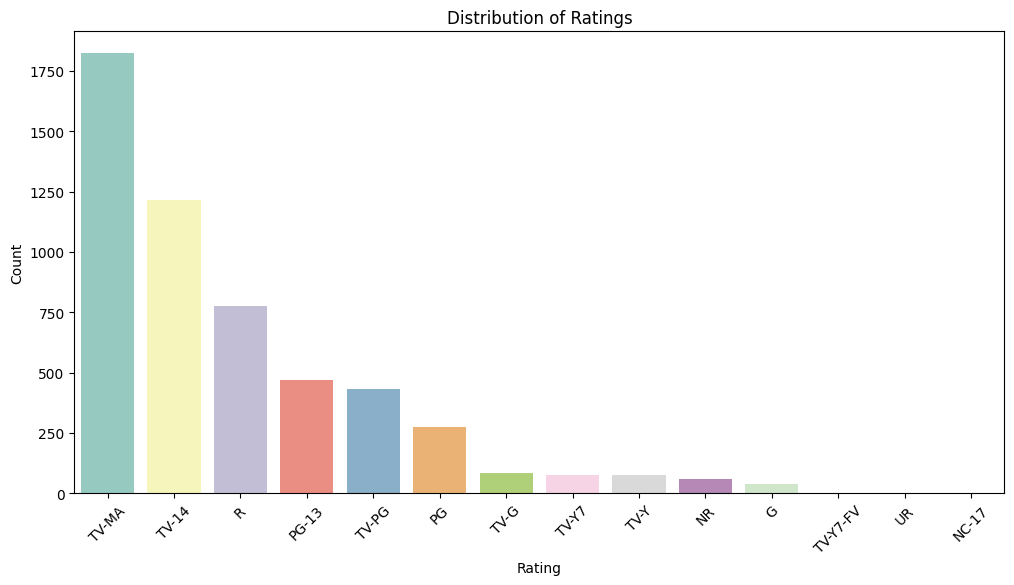

In [165]:
# Distribution of ratings
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='Set3')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Hầu hết các chương trình đều có xếp hạng 'TV-MA' và 'TV-14'

### Top 10 quốc gia sản xuất nhiều nội dung nhất

/var/folders/n5/1571yh0x7_g0dbltk948d2tm0000gn/T/ipykernel_36650/3854455207.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='Set1')


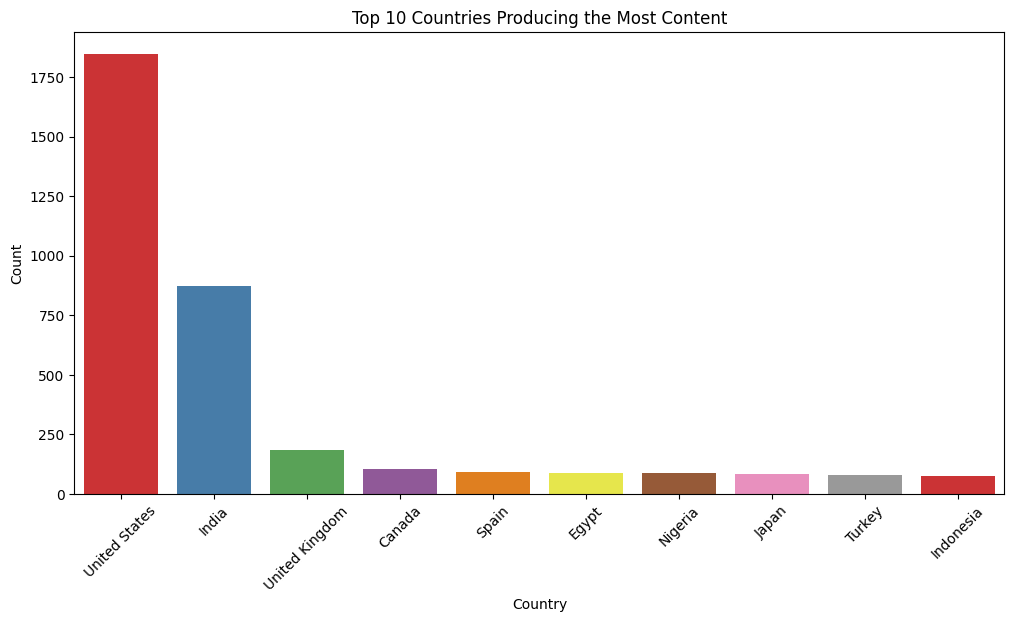

In [166]:
# Top 10 countries producing the most content
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='Set1')
plt.title('Top 10 Countries Producing the Most Content')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Kiểm tra các thể loại phổ biến nhất

/var/folders/n5/1571yh0x7_g0dbltk948d2tm0000gn/T/ipykernel_36650/2359475479.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres.values, y=genres.index, palette='Set3')


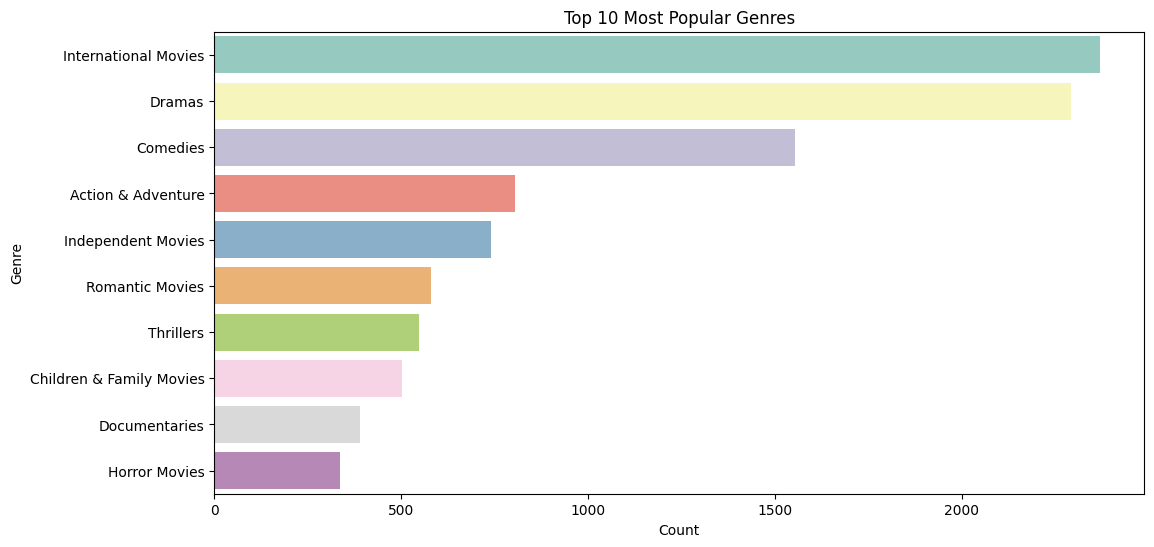

In [167]:
# Checking the most popular genres
plt.figure(figsize=(12, 6))
df['listed_in'] = df['listed_in'].str.split(', ')
genres = df['listed_in'].explode().value_counts().head(10)
sns.barplot(x=genres.values, y=genres.index, palette='Set3')
plt.title('Top 10 Most Popular Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

# 4. Phân tích hai biến

## 'Type' nào phổ biến ở các quốc gia hàng đầu?

<Axes: xlabel='country', ylabel='count'>

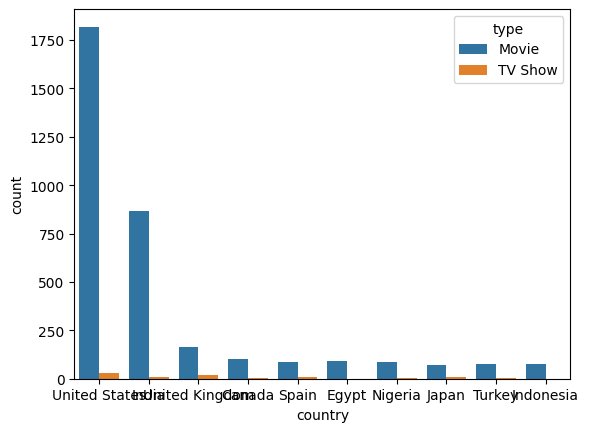

In [168]:
sns.countplot(x = df['country'], order = top_countries.index, hue = df['type'])

#### Ở Hoa Kỳ, Phim phổ biến hơn chương trình truyền hình.

#### Ở Ấn Độ, Phim phổ biến hơn chương trình truyền hình.

#### Ở Vương quốc Anh, Phim và Chương trình truyền hình đều phổ biến như nhau.

#### Ở Nhật Bản, Chương trình truyền hình phổ biến hơn Phim.

## 'Rating' phổ biến nhất ở các quốc gia hàng đầu là gì?

<Axes: xlabel='country', ylabel='count'>

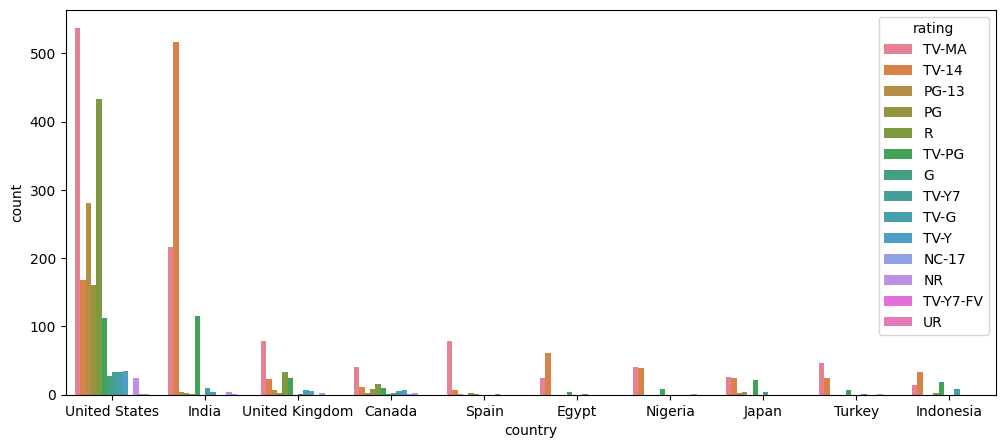

In [169]:
plt.figure(figsize=(12,5))
sns.countplot(x = df['country'], order = top_countries.index, hue =df['rating'] )

#### Ở Hoa Kỳ, hầu hết các chương trình đều được xếp hạng 'TV-MA.' 
#### Chuyển sang Ấn Độ, phần lớn các chương trình đều có xếp hạng 'TV-14'. 
#### Bây giờ, hãy đến Vương quốc Anh, nơi bạn sẽ thấy rằng hầu hết các chương trình đều được xếp hạng 'TV-MA'. 
#### Cuối cùng, ở Nhật Bản, xếp hạng chung cho hầu hết các chương trình là 'TV-14.

# **Bản tóm tắt**

#### * **69,78% nội dung trên Netflix là phim, trong khi 30,22% là chương trình truyền hình.**

#### * **"Rajiv Chilaka" là người sản xuất nhiều chương trình truyền hình nhất.**

#### * **Một phần đáng kể các chương trình trên Netflix có nguồn gốc từ Mỹ và Ấn Độ.**

#### * **Số lượng chương trình truyền hình được thêm vào nhiều nhất vào năm 2019.**

#### * **Tháng 7 và tháng 12 là hai tháng có số lượng chương trình truyền hình phát hành nhiều nhất.**

#### * **Xếp hạng phổ biến nhất cho các chương trình trên Netflix là "TV-MA" và "TV-14".**

#### * **Tại Hoa Kỳ và Ấn Độ, phim được ưa chuộng hơn chương trình truyền hình.**

#### * **Tại Vương quốc Anh, cả phim và chương trình truyền hình đều được ưa chuộng như nhau.**

#### * **Ngược lại, tại Nhật Bản, chương trình truyền hình được ưa chuộng hơn phim.**

#### * **Tại Hoa Kỳ, hầu hết các chương trình đều được xếp hạng "TV-MA".**

#### * **Tại Ấn Độ, đa số các chương trình có xếp hạng "TV-14".**

#### * **Vương quốc Anh chứng kiến sự phổ biến của xếp hạng "TV-MA".**

#### * **Cuối cùng, tại Nhật Bản, xếp hạng phổ biến cho hầu hết các chương trình là "TV-14".**